# SENTIMEN ANALISIS FUN FOOTBALL FIFA DAN PSSI

##### DENGAN MENGAPLIKASIKAN TXTSUMMARIZE, CONFUSSION MATRIX, NAIVEBAYES, ACCURACY SCORE, DLL

In [1]:
# Importing pandas library for data manipulation
import pandas as pd 

# Importing numpy library for numerical computations
import numpy as np 

# Importing libraries for text cleaning: re for regular expressions, string for string operations and unicodedata for handling unicode characters
import re, string, unicodedata

# Importing CountVectorizer from sklearn for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing TfidfTransformer from sklearn for feature extraction
from sklearn.feature_extraction.text import TfidfTransformer

# Importing MultinomialNB classifier from sklearn
from sklearn.naive_bayes import MultinomialNB

# Importing train_test_split from sklearn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing confusion_matrix and classification_report from sklearn for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Jupyter Notebook magic command to display plots inline
%matplotlib inline

# Importing unique_labels from sklearn for plotting confusion matrix
from sklearn.utils.multiclass import unique_labels

# Importing seaborn for data visualization
import seaborn as sns

# Importing wordcloud and STOPWORDS for creating word clouds
from wordcloud import WordCloud, STOPWORDS

# Importing StopWordRemoverFactory from Sastrawi for removing stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Importing BeautifulSoup for removing HTML tags
from bs4 import BeautifulSoup

# Importing Word from TextBlob for text processing
from textblob import Word

In [2]:
def preprocessing(text):
    # Function to clean text by removing HTML tags, square brackets, punctuation, and non-ASCII characters
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser") #create a BeautifulSoup object and parse the text
        return soup.get_text() #return the text from the object
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text) #remove text between square brackets
    def denoise_text(text):
        text = strip_html(text) #strip HTML tags
        text = remove_between_square_brackets(text) #remove text between square brackets
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text) #remove punctuation
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') #remove non-ascii characters
    
    # Applying text cleaning functions
    text = strip_html(text) #strip HTML tags
    text = remove_between_square_brackets(text) #remove text between square brackets
    text = remove_punctuation(text) #remove punctuation
    text = remove_non_ascii(text) #remove non-ascii characters
    
    # Converting all text to lowercase
    return text.lower()

def create_word_cloud(string):
    # Function to create a word cloud from a string
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string) #generate word cloud
    plt.imshow(cloud, interpolation='bilinear') #display the word cloud
    plt.axis('off') #turn off axis
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Function to plot confusion matrix
    if not title:
        if normalize:
            title = 'Normalized confusion matrix' #set title if normalize is true
        else:
            title = 'Confusion matrix, without normalization' #set title if normalize is false
    cm = confusion_matrix(y_true, y_pred) #create confusion matrix
    classes = classes[unique_labels(y_true, y_pred)] #get unique labels
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize confusion matrix
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plotting the confusion matrix
    fig, ax = plt.subplots() #create a new figure
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap) #display the confusion matrix
    ax.figure.colorbar(im, ax=ax) #add colorbar
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=classes, yticklabels=classes,
    title=title,
    ylabel='True label',
    xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    rotation_mode="anchor") #set tick labels
    
def PieChart(score,labels):
    # Function to plot a pie chart
    fig1 = plt.figure() ; fig1.add_subplot(111)
    plt.pie(score, labels=labels, autopct='%1.1f%%', startangle=140) #create the pie chart
    plt.axis('equal');plt.show() #display the chart
    return None

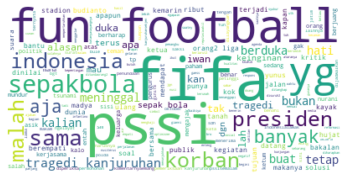

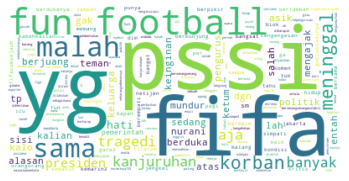

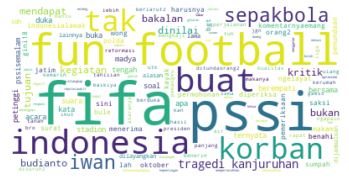

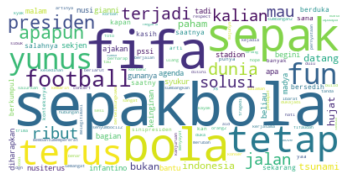

Confusion matrix, without normalization
[[6 1 0]
 [0 3 0]
 [0 0 1]]


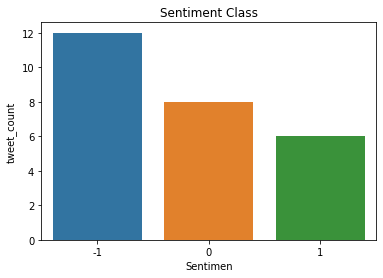

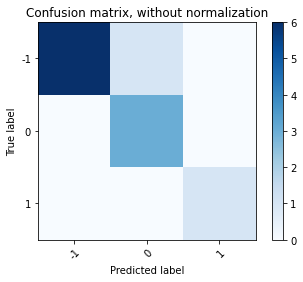

Normalized confusion matrix
[[0.86 0.14 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


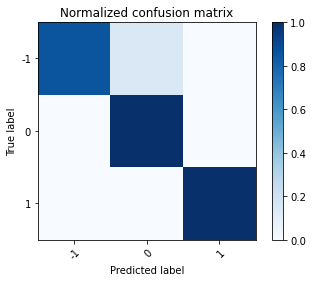

Accuracy Score :  0.9090909090909091
Recall Score:  [0.86 1.   1.  ]
Precision Score:  [1.   0.75 1.  ]
Classification Report: 
               precision    recall  f1-score   support

          -1       1.00      0.86      0.92         7
           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0.92      0.95      0.93        11
weighted avg       0.93      0.91      0.91        11

Skor Akurasi:  0.7


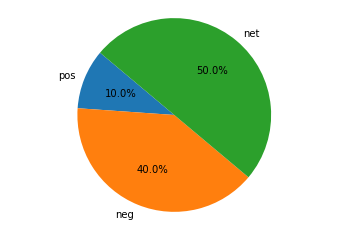

In [3]:
df = pd.read_csv("datasetFunFootball.csv") #read the csv file

df['Sentence'] = df['Sentence'].apply(preprocessing) #apply the preprocessing function to the 'Sentence' column

stop_factory = StopWordRemoverFactory() #create a StopWordRemoverFactory object
stop = stop_factory.get_stop_words() #get stop words
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #remove stop words from the 'Sentence' column

negatif = df.loc[df['Sentimen'] == -1] #create a new dataframe for negative sentiment
netral = df.loc[df['Sentimen'] == 0] #create a new dataframe for neutral sentiment
positif  = df.loc[df['Sentimen'] == 1] #create a new dataframe for positive sentiment

all_ = "".join(df.Sentence.values) #concatenate all sentences in the dataframe
all_negatif = "".join(negatif.Sentence.values) #concatenate all sentences in the negative sentiment dataframe
all_netral = "".join(netral.Sentence.values) #concatenate all sentences in the neutral sentiment dataframe
all_positif = "".join(positif.Sentence.values) #concatenate all sentences in the positive sentiment dataframe

create_word_cloud(all_) #create a word cloud of all sentences
create_word_cloud(all_negatif) #create a word cloud of negative sentiment sentences
create_word_cloud(all_netral) #create a word cloud of neutral sentiment sentences
create_word_cloud(all_positif) #create a word cloud of positive sentiment sentences

sentiment = df.groupby(['Sentimen'])['Sentimen'].count() #group the dataframe by sentiment and count the number of each sentiment
chart = pd.DataFrame(sentiment) #create a new dataframe from the grouped data
chart['tweet_count'] = chart['Sentimen'] #create a new column 'tweet_count' and assign the sentiment count
chart.drop(['Sentimen'], axis = 1, inplace = True ) #drop the 'Sentimen' column
chart = chart.reset_index() #reset the index
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum() #create a new column 'percent' and calculate the percentage of each sentiment
ax = sns.barplot(x= 'Sentimen', y='tweet_count', data=chart) #create a bar plot of the sentiment and tweet count data
ax.set_title('Sentiment Class') #set the title of the plot

count_vect = CountVectorizer() #create a CountVectorizer object
countsv = count_vect.fit_transform(df['Sentence']) #fit and transform the 'Sentence' column
transformer = TfidfTransformer().fit(countsv) #create a TfidfTransformer object and fit it to the transformed count data
countsv = transformer.transform(countsv) #transform the count data
X_train, X_test, y_train, y_test = train_test_split(countsv,df['Sentimen'], test_size=0.4, random_state=69) #split the data into training and testing sets
model = MultinomialNB().fit(X_train, y_train) #create and fit a MultinomialNB model to the training data
predicted = model.predict(X_test) #predict the sentiment of the test data
np.set_printoptions(precision=2)
dff = np.array(('0','1','-1'),dtype='U10') #create an array of class labels
plot_confusion_matrix(y_test, predicted, classes=dff,
title='Confusion matrix, without normalization') #create a confusion matrix plot without normalization
plt.show()

plot_confusion_matrix(y_test, predicted, classes=dff, normalize=True,
title='Normalized confusion matrix') #create a confusion matrix plot with normalization
plt.show()

print("Accuracy Score : ",accuracy_score(y_test, predicted)) #print the accuracy score
print("Recall Score: ",recall_score(y_test, predicted, average=None)) #print the recall score
print("Precision Score: ",precision_score(y_test, predicted, average=None)) #print the precision score
print("Classification Report: \n",classification_report(y_test, predicted)) #print the classification report

uji = pd.read_csv("dataujiFunFootball.csv") #read the test data
uji['Sentence'] = uji['Sentence'].apply(preprocessing) #apply the preprocessing function to the 'Sentence' column

Xtes = count_vect.transform(uji['Sentence']) #transform the 'Sentence' column
sentimen_uji = model.predict(Xtes) #predict the sentiment of the test data
sentimen_uji

tes = np.array([-1,1,-1,0,-1,0,-1,0,-1,0]) #create an array of the actual sentiment labels

skorcfm2 = np.mean(sentimen_uji == tes) #calculate the accuracy score
print("Skor Akurasi: ",skorcfm2)

Se2 = []
for i in sentimen_uji:
    if i==1:
        Se2.append('pos')
    elif i==-1:
        Se2.append('neg')
    else:
        Se2.append('net')

for i in Se2:
    score_se2 = [len([True for t in Se2 if t=='pos']),
    len([True for t in Se2 if t=='neg']),
    len([True for t in Se2 if t=='net'])]
    
label_se2 = ['pos','neg','net']
PieChart(score_se2, label_se2) #create a pie chart of the predicted sentiment labels